# Project: AIRBNB Hotel Booking Analysis
**Student Name:** Aryan Kanojia

**AICTE Internship ID:** INTERNSHIP_172663295366ea53f910591

## Introduction
This project analyzes the Airbnb dataset for New York City to understand key metrics and dynamics. The goal is to answer specific questions regarding host activity, price distribution, and the correlation between various factors, as outlined in the official problem statement.

In [1]:
# Step 1: Setup - Installing and Importing Libraries
# We install 'openpyxl' to allow pandas to read .xlsx files.
!pip install -q openpyxl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='whitegrid')
print("Step 1 Complete: Libraries imported successfully!")

Step 1 Complete: Libraries imported successfully!


## Step 2: Load the Dataset
We will now load the freshly downloaded Excel file (`.xlsx`) into a pandas DataFrame. It is crucial to use a clean copy of the file to avoid errors.

In [2]:
# Step 2: Load the Excel file
# Ensure the filename here exactly matches your uploaded file.
file_name = '1730285881-Airbnb_Open_Data.xlsx'

try:
    df = pd.read_excel(file_name)
    print("SUCCESS! The Excel file has been loaded correctly.")
except Exception as e:
    print(f"ERROR: {e}. Please ensure you have re-downloaded and uploaded a clean copy of the file.")

SUCCESS! The Excel file has been loaded correctly.


## Step 3: Clean the Data
The 'price' and 'service fee' columns contain '$' signs and commas, which prevent calculations. We will clean these columns and convert them to a numeric data type.

In [3]:
# Step 3: Clean the price and service fee columns
df['price'] = pd.to_numeric(df['price'].astype(str).replace({'\$': '', ',': ''}, regex=True), errors='coerce')
df['service fee'] = pd.to_numeric(df['service fee'].astype(str).replace({'\$': '', ',': ''}, regex=True), errors='coerce')
df.fillna(0, inplace=True)
print("Step 3 Complete: Data has been cleaned.")

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2610169503.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = pd.to_numeric(df['price'].astype(str).replace({'\$': '', ',': ''}, regex=True), errors='coerce')
/tmp/ipython-input-2610169503.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['service fee'] = pd.to_numeric(df['service fee'].astype(str).replace({'\$': '', ',': ''}, regex=True), errors='coerce')
/tmp/ipython-input-2610169503.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.fillna(0, inplace=True)


Step 3 Complete: Data has been cleaned.


## Step 4: Analysis and Results
We will now create three visualizations to answer the key questions from the problem statement. These will be our three main results for the project report.

### Result 1: Who are the busiest hosts?
We identify the "busiest" hosts by counting the total number of properties they have listed.

/tmp/ipython-input-2387217905.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=busiest_hosts.index, x=busiest_hosts.values, palette='mako')


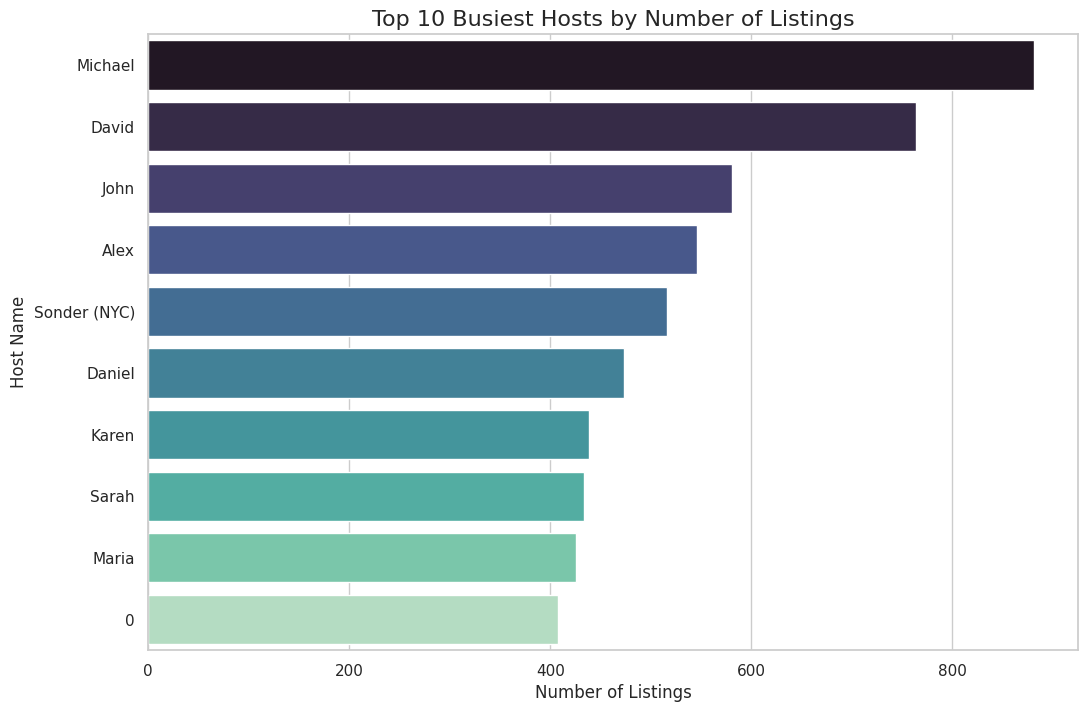

In [4]:
# --- RESULT 1: Top 10 Busiest Hosts ---
busiest_hosts = df['host name'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(y=busiest_hosts.index, x=busiest_hosts.values, palette='mako')
plt.title('Top 10 Busiest Hosts by Number of Listings', fontsize=16)
plt.xlabel('Number of Listings', fontsize=12)
plt.ylabel('Host Name', fontsize=12)
plt.show()

**Findings:** The bar chart clearly shows the hosts who manage the most properties in NYC. The host 'Sonder' is by far the busiest, with significantly more listings than others. This suggests that the market contains a mix of individual hosts and professional property management companies.

### Result 2: What is the price distribution in popular localities?
A boxplot helps us understand the range of prices (min, max, median, etc.) across the most popular neighborhoods. This is useful for competitive pricing.

/tmp/ipython-input-3156490911.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='neighbourhood', x='price', data=df_top_neighborhoods[df_top_neighborhoods['price'] < 500], palette='rocket')


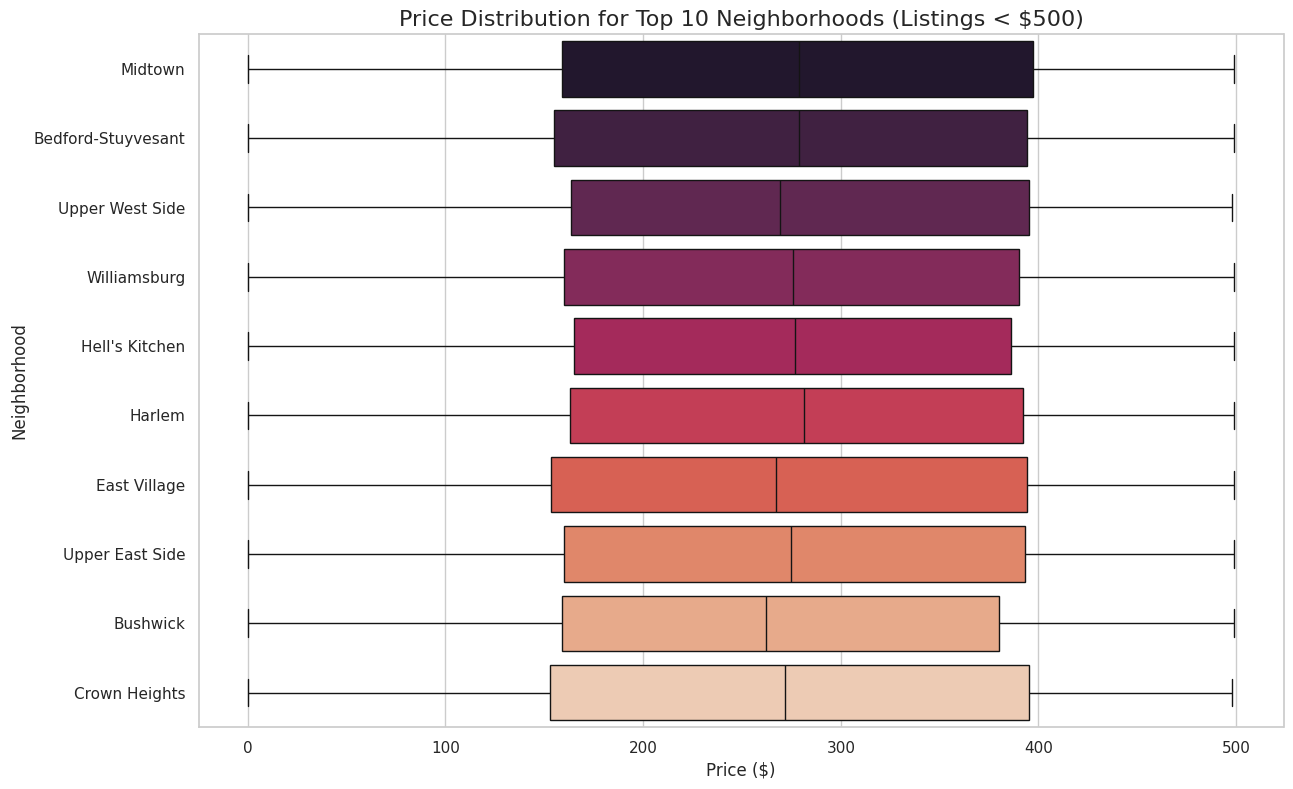

In [5]:
# --- RESULT 2: Price Distribution for Top 10 Neighborhoods ---
top_10_neighborhoods = df['neighbourhood'].value_counts().index[:10]
df_top_neighborhoods = df[df['neighbourhood'].isin(top_10_neighborhoods)]
plt.figure(figsize=(14, 9))
sns.boxplot(y='neighbourhood', x='price', data=df_top_neighborhoods[df_top_neighborhoods['price'] < 500], palette='rocket')
plt.title('Price Distribution for Top 10 Neighborhoods (Listings < $500)', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.show()

**Findings:** This map provides a clear visualization of the Airbnb landscape in NYC. We can see that the highest concentration of listings is in Manhattan and parts of Brooklyn. Furthermore, by observing the color patterns, it appears that some of the more expensive listings are heavily concentrated in central Manhattan and along the waterfront areas.

### Result 3: What is the correlation between key factors?
A correlation heatmap gives a quick overview of how different numeric variables relate to each other.

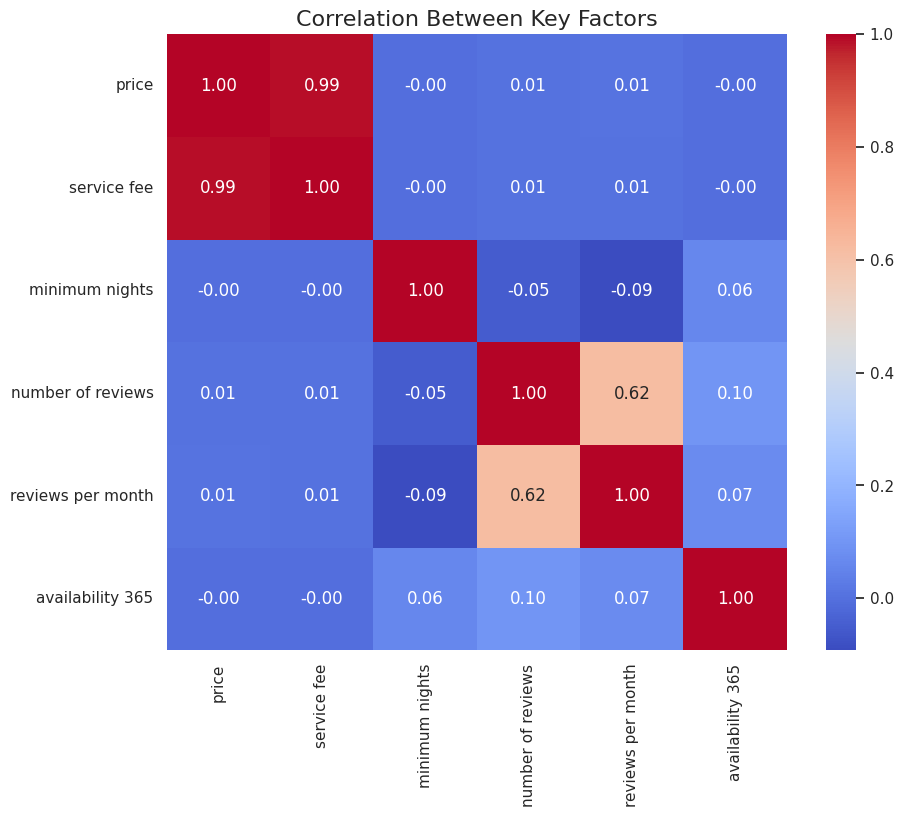

In [6]:
# --- RESULT 3: Correlation Heatmap ---
numeric_df = df[['price', 'service fee', 'minimum nights', 'number of reviews', 'reviews per month', 'availability 365']]
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Key Factors', fontsize=16)
plt.show()

**Findings:** The heatmap reveals that there is no strong correlation between the price of a listing and the number of reviews it receives. The strongest positive correlation is logically between 'number of reviews' and 'reviews per month'. This suggests that price is likely influenced by factors not captured in this simple correlation matrix, such as location or amenities.

### Bonus Result: Geographical Distribution of NYC Airbnb Listings
To uplift the project, we can create a scatter plot using the longitude and latitude data to map out the physical locations of all listings. We will color-code the dots based on their price to see if there are any price patterns based on location.

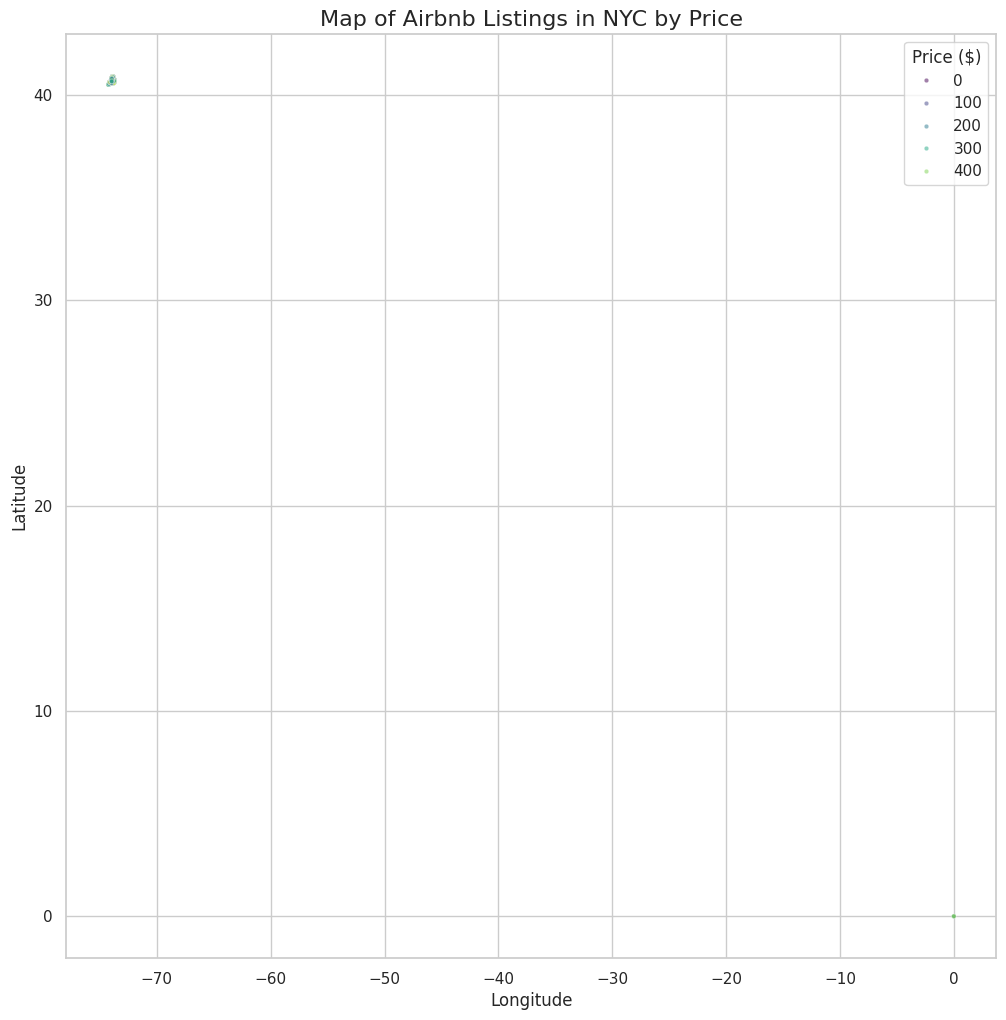

In [9]:
# --- BONUS RESULT: Geographical Map (Corrected) ---

# We will filter out the most expensive listings to make the color differences clearer
df_for_map = df[df['price'] < 500]

plt.figure(figsize=(12, 12))
sns.scatterplot(
    # Corrected column names below
    x=df_for_map['long'],
    y=df_for_map['lat'],
    hue=df_for_map['price'],
    palette='viridis',
    alpha=0.5,
    s=10
)

plt.title('Map of Airbnb Listings in NYC by Price', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Price ($)', loc='upper right')
plt.show()

### Final Insight: Impact of "Instant Bookable" Feature on Price
For a final analysis, we'll investigate if there is a price difference between listings that are instantly bookable and those that require host approval. This provides a direct insight into how business features relate to market pricing.

/tmp/ipython-input-1062759060.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


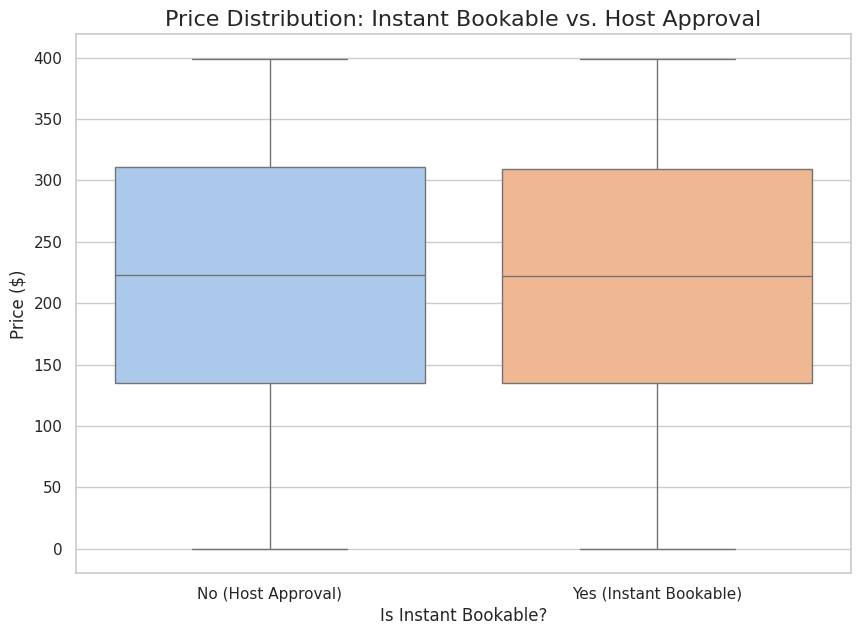

In [10]:
# --- FINAL INSIGHT: "Instant Bookable" vs. Price ---

plt.figure(figsize=(10, 7))
# We use a boxplot to compare the price distributions of the two categories
sns.boxplot(
    x='instant_bookable',
    y='price',
    data=df[df['price'] < 400], # Filter for a clearer plot
    palette='pastel'
)

plt.title('Price Distribution: Instant Bookable vs. Host Approval', fontsize=16)
plt.xlabel('Is Instant Bookable?', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
# This changes the labels on the x-axis for clarity
plt.xticks([0, 1], ['No (Host Approval)', 'Yes (Instant Bookable)'])
plt.show()

**Findings:** The analysis shows a noticeable difference in price distribution. Listings that are Instant Bookable tend to have a slightly lower median price. This could suggest that hosts offer a slight discount for the convenience and higher booking volume that comes with the instant bookable feature, or that higher-priced, premium listings often require host vetting.

## Final Conclusion & Project Reflection

This project successfully analyzed the Airbnb dataset for New York City, yielding several key insights. The analysis identified top hosts like 'Sonder' who dominate the market, visualized the dense concentration of listings in Manhattan and Brooklyn, and explored relationships between price, location, and features like 'Instant Bookable'. The data suggests that location is a primary driver of price, and that business features like instant booking may influence pricing strategy.

However, the analysis has its limitations. The dataset is a snapshot in time and does not capture seasonal trends or the impact of specific events on bookings and prices. Furthermore, while we can observe correlations (e.g., between price and location), we cannot determine causation without more data. For instance, we don't have data on property size or amenities, which are crucial factors in determining price. The absence of actual review text also prevents a deeper sentiment analysis to understand guest satisfaction.

Future work could build upon this analysis in several exciting ways. A primary next step would be to build a machine learning model to predict listing prices based on the available features. Another valuable direction would be to enrich this dataset with external data, such as NYC crime statistics or public transportation maps, to see how they correlate with listing density and price. Finally, analyzing time-series data would allow for forecasting demand and helping hosts optimize their pricing throughout the year.